In [ ]:
!pip install gensim scikit-learn matplotlib
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('punkt_tab') # Added to download the missing resource

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 50.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Sample corpus
corpus = [
    "In the context of Generative AI, inferencing refers to the process of using a trained model to make predictions or generate outputs based on new input data",
    "Prompt engineering involves several techniques, including prompt selection, prompt formatting, and prompt tuning",
    "Prompt selection involves choosing the right words and phrasing to effectively communicate the desired task to the model",
    "A prompt is the input given to a language model, and it can be thought of as a set of instructions or a question that the model is being asked to answer"
]

In [ ]:
# Tokenize sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print(tokenized_corpus)

[['in', 'the', 'context', 'of', 'generative', 'ai', ',', 'inferencing', 'refers', 'to', 'the', 'process', 'of', 'using', 'a', 'trained', 'model', 'to', 'make', 'predictions', 'or', 'generate', 'outputs', 'based', 'on', 'new', 'input', 'data'], ['prompt', 'engineering', 'involves', 'several', 'techniques', ',', 'including', 'prompt', 'selection', ',', 'prompt', 'formatting', ',', 'and', 'prompt', 'tuning'], ['prompt', 'selection', 'involves', 'choosing', 'the', 'right', 'words', 'and', 'phrasing', 'to', 'effectively', 'communicate', 'the', 'desired', 'task', 'to', 'the', 'model'], ['a', 'prompt', 'is', 'the', 'input', 'given', 'to', 'a', 'language', 'model', ',', 'and', 'it', 'can', 'be', 'thought', 'of', 'as', 'a', 'set', 'of', 'instructions', 'or', 'a', 'question', 'that', 'the', 'model', 'is', 'being', 'asked', 'to', 'answer']]


In [ ]:
# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
# Save the model
model.save("word2vec.model")

model = Word2Vec.load("word2vec.model")

In [ ]:
# Get vectors for a subset of words
words = list(model.wv.index_to_key)[:10]  # Select the first 10 words
print(words)
word_vectors = [model.wv[word] for word in words]
print(word_vectors)

['the', 'prompt', 'to', 'a', ',', 'model', 'of', 'and', 'is', 'selection']
[array([-5.7994638e-04,  1.9482449e-04,  5.1614209e-03,  9.0254899e-03,
       -9.3128625e-03, -7.1404455e-03,  6.4429468e-03,  9.0717869e-03,
       -4.9977256e-03, -3.8169271e-03,  7.3459409e-03, -1.5813359e-03,
       -4.5272633e-03,  6.5997802e-03, -4.8478306e-03, -1.8065800e-03,
        2.9191319e-03,  9.9269068e-04, -8.3372425e-03, -9.4724456e-03,
        7.3377476e-03,  5.0744168e-03,  6.8220235e-03,  7.1543775e-04,
        6.3966848e-03, -3.4361281e-03, -9.8024018e-04,  5.7616918e-03,
       -7.5524361e-03, -3.8927181e-03, -7.4795382e-03, -9.5925009e-04,
        9.5975883e-03, -7.4196239e-03, -2.3568212e-03, -1.8931092e-03,
        8.0789579e-03, -5.9124511e-03,  5.1262461e-05, -4.7594998e-03,
       -9.5755309e-03,  5.0201891e-03, -8.8200700e-03, -4.4177622e-03,
       -9.6626582e-06, -3.1099760e-04, -7.6682842e-03,  9.5850173e-03,
        4.9838992e-03,  9.2612961e-03, -8.0852685e-03,  4.4311150e-03,
 

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

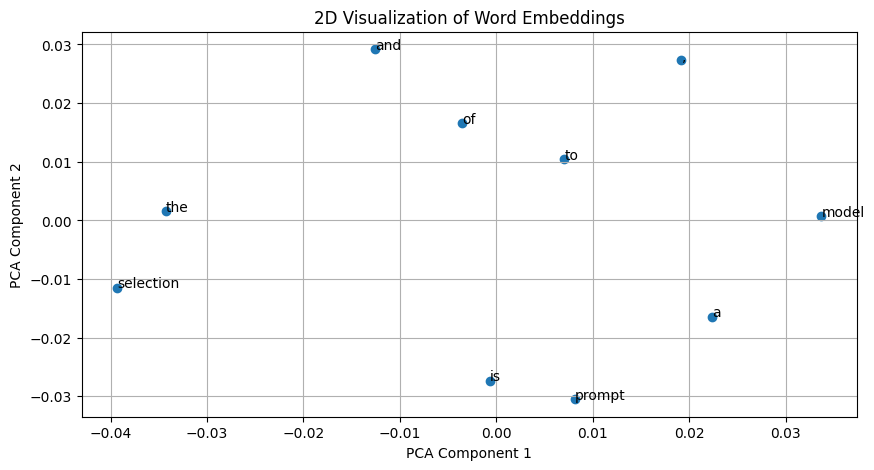

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)
# Plot the words in 2D space
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
# Annotate the points with the words
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))


plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()